In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests 
import json
import datetime

from pprint import pprint

In [2]:
url = "https://maps2.dcgis.dc.gov/dcgis/rest/services/DCGIS_DATA/Public_Safety_WebMercator/MapServer/24/query?where=1%3D1&outFields=*&outSR=4326&f=json&returnIdsOnly=true"

In [3]:
response = requests.get(url)
resp_dict = json.loads(response.text)
objectIds = resp_dict["objectIds"]
objectId_count = len(objectIds)

  
crash_data = []  
count = 0
start = 0
end = 0
batch = 125

while count < objectId_count:

    end = end + batch
    url = "https://maps2.dcgis.dc.gov/dcgis/rest/services/DCGIS_DATA/Public_Safety_WebMercator/MapServer/24/query?where=1%3D1&outFields=*&outSR=4326&f=json&objectIds= "+ str(objectIds[start:end]).replace('[','').replace(']','')

    response_new = requests.get(url).json()
    start = end   
    count = count + batch 
    data = response_new['features']
    
    i = 0
    for x in data:
        crash_data.append(data[i]['attributes'])
        i = i + 1

In [4]:
master_df = pd.DataFrame(crash_data)
master_df

,ADDRESS,BICYCLISTSIMPAIRED,CCN,CRIMEID,DRIVERSIMPAIRED,EVENTID,FATAL_BICYCLIST,FATAL_DRIVER,FATAL_PEDESTRIAN,FROMDATE,...,TOTAL_GOVERNMENT,TOTAL_PEDESTRIANS,TOTAL_TAXIS,TOTAL_VEHICLES,UNKNOWNINJURIES_BICYCLIST,UNKNOWNINJURIES_DRIVER,UNKNOWNINJURIES_PEDESTRIAN,WARD,XCOORD,YCOORD
0,3104 24TH STREET NE,0,18097652,27708510,0,{51B064C1-87D9-4868-B31C-7B0B71E40899},0,0,0,1.529107e+12,...,0,0,0,2,0,0,0,Ward 5,402381.744,140195.576
1,3691 22ND STREET SE,0,18097667,27708515,0,{5950C18A-0452-47DB-9146-E71DA9FDFCB8},0,0,0,1.529107e+12,...,0,0,0,2,0,0,0,Ward 8,402416.885,130683.528
2,300 MASSACHUSETTS AVENUE NE,0,18096364,27708607,0,{FDD73EC8-DFFC-4C1D-80D3-069E9BA0ED5C},0,0,0,1.528934e+12,...,0,0,0,0,0,0,0,Ward 6,399883.210,136326.730
3,2014 OTIS STREET NE,0,18097699,27708547,0,{D4D5E08C-3034-40FC-8BCF-A719D0390276},0,0,0,1.529107e+12,...,0,0,0,2,0,0,0,Ward 5,402173.886,140800.181
4,3725 12TH STREET NE,0,18097702,27708556,0,{19D892EF-ABF9-47F1-8476-3FD4E61183AD},0,0,0,1.529107e+12,...,0,0,0,3,0,0,0,Ward 5,400762.084,140839.124
5,1630 7TH STREET NW,0,18097442,27707924,0,{7133F605-C77D-48B2-86BF-143FA577F6FD},0,0,0,1.529021e+12,...,0,0,0,1,0,0,0,Ward 2,398072.763,138304.781
6,1305 SAVANNAH STREET SE,0,18097741,27708594,0,{F4CFF90A-C2D3-40FC-AB0E-7D0E0706257C},0,0,0,1.529107e+12,...,0,0,0,2,0,0,0,Ward 8,401066.001,130599.461
7,1805 MONTANA AVENUE NE,0,18097737,27708603,0,{BF8786A5-005F-44D6-8A89-BE60DAED1D49},0,0,0,1.529107e+12,...,0,0,0,2,0,0,0,Ward 5,401850.523,139072.201
8,3827 PENNSYLVANIA AVENUE SE,0,18097748,27708608,0,{F9740465-9CDA-439A-A93E-3808092F7654},0,0,0,1.529107e+12,...,0,0,0,3,0,0,0,Ward 7,404185.567,133067.086
9,INTERSTATE 395 INTERSTATE BN,0,18097735,27708615,0,{E05A0BCB-9A5C-4EBA-808C-8AB75B0E8329},0,0,0,1.529021e+12,...,1,0,0,3,0,0,0,Ward 2,398933.900,135111.310


In [12]:
crash_time = master_df[["ADDRESS", "WARD", "REPORTDATE", "TOTAL_GOVERNMENT", "TOTAL_PEDESTRIANS", 
                        "TOTAL_TAXIS", "TOTAL_VEHICLES", "TOTAL_BICYCLES"]]
crash_time.head()

,ADDRESS,WARD,REPORTDATE,TOTAL_GOVERNMENT,TOTAL_PEDESTRIANS,TOTAL_TAXIS,TOTAL_VEHICLES,TOTAL_BICYCLES
0,3104 24TH STREET NE,Ward 5,1.529138e+12,0,0,0,2,0
1,3691 22ND STREET SE,Ward 8,1.529138e+12,0,0,0,2,0
2,300 MASSACHUSETTS AVENUE NE,Ward 6,1.529159e+12,0,0,0,0,0
3,2014 OTIS STREET NE,Ward 5,1.529143e+12,0,0,0,2,0
4,3725 12TH STREET NE,Ward 5,1.529145e+12,0,0,0,3,0


In [22]:
crash_time["REPORTDATE"] = pd.to_datetime(crash_time['REPORTDATE'],unit='ms')
crash_time["YEAR"]=pd.DatetimeIndex(crash_time["REPORTDATE"]).year
crash_time["HOUR"]=pd.DatetimeIndex(crash_time["REPORTDATE"]).hour

crash_time.head()

/anaconda2/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda2/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda2/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

,ADDRESS,WARD,REPORTDATE,TOTAL_GOVERNMENT,TOTAL_PEDESTRIANS,TOTAL_TAXIS,TOTAL_VEHICLES,TOTAL_BICYCLES,YEAR,HOUR,TIME DEMOGRAPHIC
0,3104 24TH STREET NE,Ward 5,2018-06-16 08:25:48,0,0,0,2,0,2018.0,8.0,Morning Rush Hour
1,3691 22ND STREET SE,Ward 8,2018-06-16 08:39:23,0,0,0,2,0,2018.0,8.0,Morning Rush Hour
2,300 MASSACHUSETTS AVENUE NE,Ward 6,2018-06-16 14:25:35,0,0,0,0,0,2018.0,14.0,9:00-15:00
3,2014 OTIS STREET NE,Ward 5,2018-06-16 09:58:26,0,0,0,2,0,2018.0,9.0,Morning Rush Hour
4,3725 12TH STREET NE,Ward 5,2018-06-16 10:23:42,0,0,0,3,0,2018.0,10.0,9:00-15:00


In [14]:
#while crash_time["YEAR"] >= 2008: 


In [15]:
bins = [-1, 6, 9, 15, 18, 24]
time_frames = ["Midnight-6:00", "Morning Rush Hour", "9:00-15:00", "Afternoon Rush Hour", "18:00-Midnight"]
crash_time["TIME DEMOGRAPHIC"] = pd.cut(pd.to_numeric(crash_time['HOUR'], errors='coerce'), bins, labels=time_frames)

time_demo = crash_time.groupby(["TIME DEMOGRAPHIC"])
crash_count = time_demo["ADDRESS"].count()

demographic_df = pd.DataFrame({"Crash Count": crash_count})
demographic_df

/anaconda2/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Crash Count
TIME DEMOGRAPHIC,
Midnight-6:00,124472
Morning Rush Hour,6107
9:00-15:00,17585
Afternoon Rush Hour,13100
18:00-Midnight,22271


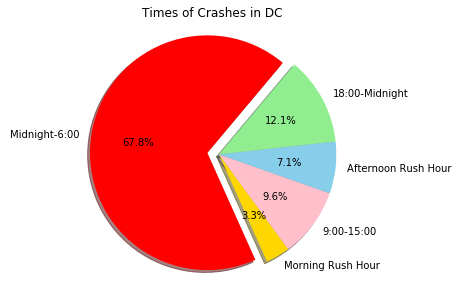

In [52]:
labels = ["Midnight-6:00", "Morning Rush Hour", "9:00-15:00", "Afternoon Rush Hour", "18:00-Midnight"]
colors = ["red", "gold", "pink", "skyblue", "lightgreen"]
sizes = crash_count
explode = explode = (0.1, 0, 0, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=50)
plt.axis("equal")
plt.tight_layout()
plt.title("Times of Crashes in DC")
plt.savefig("Crash_Times.png", bbox_inches="tight")
plt.show()

In [17]:
ward_two = crash_time.loc[crash_time["WARD"]=="Ward 2", :]
ward_demo = ward_two.groupby(["TIME DEMOGRAPHIC"])
ward_count = ward_demo["ADDRESS"].count()

ward_df = pd.DataFrame({"Ward Count": ward_count})
ward_df

,Ward Count
TIME DEMOGRAPHIC,
Midnight-6:00,28839
Morning Rush Hour,1334
9:00-15:00,3964
Afternoon Rush Hour,3156
18:00-Midnight,5063


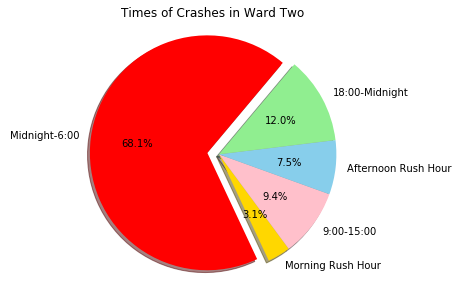

In [54]:
labels = ["Midnight-6:00", "Morning Rush Hour", "9:00-15:00", "Afternoon Rush Hour", "18:00-Midnight"]
colors = ["red", "gold", "pink", "skyblue", "lightgreen"]
sizes = ward_count
explode = explode = (0.1, 0, 0, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=50)
plt.axis("equal")
plt.tight_layout()
plt.title("Times of Crashes in Ward Two")
plt.savefig("Ward_Two_Crash_Times.png", bbox_inches="tight")
plt.show()

In [28]:
crash_time["MONTH"]=pd.DatetimeIndex(crash_time["REPORTDATE"]).month
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
months = ["Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec"]

crash_time["MONTH DEMOGRAPHIC"] = pd.cut(pd.to_numeric(crash_time['MONTH'], errors='coerce'), bins, labels=months)
crash_time.head()

/anaconda2/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda2/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,ADDRESS,WARD,REPORTDATE,TOTAL_GOVERNMENT,TOTAL_PEDESTRIANS,TOTAL_TAXIS,TOTAL_VEHICLES,TOTAL_BICYCLES,YEAR,HOUR,TIME DEMOGRAPHIC,MONTH,MONTH DEMOGRAPHIC
0,3104 24TH STREET NE,Ward 5,2018-06-16 08:25:48,0,0,0,2,0,2018.0,8.0,Morning Rush Hour,6.0,June
1,3691 22ND STREET SE,Ward 8,2018-06-16 08:39:23,0,0,0,2,0,2018.0,8.0,Morning Rush Hour,6.0,June
2,300 MASSACHUSETTS AVENUE NE,Ward 6,2018-06-16 14:25:35,0,0,0,0,0,2018.0,14.0,9:00-15:00,6.0,June
3,2014 OTIS STREET NE,Ward 5,2018-06-16 09:58:26,0,0,0,2,0,2018.0,9.0,Morning Rush Hour,6.0,June
4,3725 12TH STREET NE,Ward 5,2018-06-16 10:23:42,0,0,0,3,0,2018.0,10.0,9:00-15:00,6.0,June


In [29]:
bins = [0, 3, 6, 9, 12]
season = ["Winter", "Spring", "Summer", "Fall"]

crash_time["SEASON"] = pd.cut(pd.to_numeric(crash_time['MONTH'], errors='coerce'), bins, labels=season)
crash_time.head()

/anaconda2/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,ADDRESS,WARD,REPORTDATE,TOTAL_GOVERNMENT,TOTAL_PEDESTRIANS,TOTAL_TAXIS,TOTAL_VEHICLES,TOTAL_BICYCLES,YEAR,HOUR,TIME DEMOGRAPHIC,MONTH,MONTH DEMOGRAPHIC,SEASON
0,3104 24TH STREET NE,Ward 5,2018-06-16 08:25:48,0,0,0,2,0,2018.0,8.0,Morning Rush Hour,6.0,June,Spring
1,3691 22ND STREET SE,Ward 8,2018-06-16 08:39:23,0,0,0,2,0,2018.0,8.0,Morning Rush Hour,6.0,June,Spring
2,300 MASSACHUSETTS AVENUE NE,Ward 6,2018-06-16 14:25:35,0,0,0,0,0,2018.0,14.0,9:00-15:00,6.0,June,Spring
3,2014 OTIS STREET NE,Ward 5,2018-06-16 09:58:26,0,0,0,2,0,2018.0,9.0,Morning Rush Hour,6.0,June,Spring
4,3725 12TH STREET NE,Ward 5,2018-06-16 10:23:42,0,0,0,3,0,2018.0,10.0,9:00-15:00,6.0,June,Spring


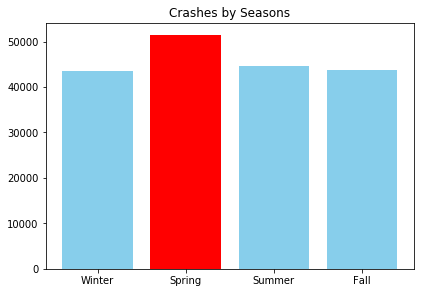

In [55]:
season_demo = crash_time.groupby(["SEASON"])
season_count = season_demo["ADDRESS"].count()
color = ["skyblue", "red", "skyblue", "skyblue"]
plt.bar(season, season_count, color=color, align="center")
plt.tight_layout()
plt.title("Crashes by Seasons")
plt.savefig("Crashes_by_Season.png", bbox_inches="tight")
plt.show()

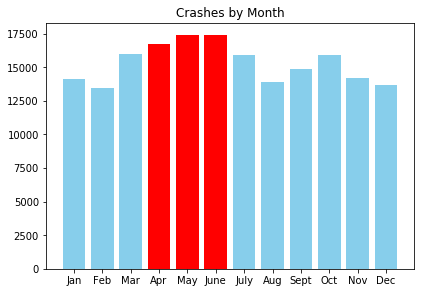

In [56]:
month_demo = crash_time.groupby(["MONTH"])
month_count = month_demo["ADDRESS"].count()

color = ["skyblue", "skyblue", "skyblue", "red", "red", "red", "skyblue", "skyblue", "skyblue", "skyblue", "skyblue", "skyblue"]
plt.bar(months, month_count, color=color, align="center")
plt.tight_layout()
plt.title("Crashes by Month")
plt.savefig("Crashes_by_Month.png", bbox_inches="tight")
plt.show()